## <p style="text-align: center;">B9AI104_2122_TMD3_CA_2</p>
### <p style="text-align: center;"> Details </p>
#### <p style="text-align: center;">Name: Sunil Judhistira Gauda</p>
#### <p style="text-align: center;">Student ID : 10595858 </p>

# Question
Apply at least three types of CNN on a folder of image, evaluate each model underlying the same operational conditions and specify the best model.
Deploy the best model in a web application. 

#### Data Preparation and Visualization: Kenneth Xavier Dsilva (10600644)
#### ResNet: Swaraj Shaw
#### AlexNet: Anjali Kumari
#### VGG16: Sunil Gauda
#### Deployment: Sunil Gauda

## Classifying Species of birds for Comparative study of Deep Learning models

### Important Links
#### Data Set
- Original Data Set URL  - https://www.kaggle.com/datasets/gpiosenka/100-bird-species
- Reduced Data Set URL - https://drive.google.com/drive/folders/1Qos0Qr3BtJDepjh63G9hO2-cIikxcULs?usp=sharing
#### We App Source code Link
- https://github.com/sunil3092/DeepLearningDeploy
#### Model Source Code Link
- https://drive.google.com/drive/folders/1JBHID6ZPW87Sqrjh3e177eRhP4an4xEt?usp=sharing

NOTE : Please Copy the **Model** Folder that contains the trained model in the root directory of the web-application before using the **Web Application**, the model when trained had 1.4 GB of variable file which is necessary for the model to run, but due to this technical limitation the application cannot be deployed to any webserver as free-tier web servers provide maximum upload size of 100 MB

## Business Undestanding

Birds have varying range of features, some are so similar that just human vision cannot spot a diffrence, in this project we will use deep learning to determine what speaces of bird it is when an image is priovided as the data

### Basic Imports

We have used ***Tensorflow*** to build and train the model, using which we have created 3 models

1. Resnet - 101 - Developed and Provided by Google in tensorflow
2. Alexnet - Developed In the Excercise
3. VGG16 - Implemented by Google in tensorflow

In [3]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications import ResNet101V2, VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pickle


## Data Undestanding
Data we have are images of over 100 speaces of birds which are reduced to 6 speices due to computation limitations, the images are color images of birds with class name as species of the birds. The data we have consist of seperate Train, Test, Validation data

### Data Directory
NOTE: Please change to appropriate direcotry as per the downloaded data set from the URL Provided

In [4]:
train_directory='../../../../../DataSets/IMG-100/train'
val_directory='../../../../../DataSets/IMG-100/valid'
test_directory='../../../../../DataSets/IMG-100/test'

## Data Augmentation

#### Using Tensorflow Keras Image Generator to Transform our data

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

#### Image Size
We are transofrming our image in to 244 X 244 pixels of images so that we can preserve integrety of images as birds have finer details that disngush themselves , and provide appropricate data for our models to compute in our systems, below we load out **Train, Test, Validation** data

In [6]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=16)

val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=16)
                                                 
                                                 
test_gemerator=test_datagen.flow_from_directory(test_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=16)

Found 822 images belonging to 6 classes.
Found 30 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


## Data Exploration

We can print and see how many classes does our data have

In [8]:
train_generator.class_indices

{'ANNAS HUMMINGBIRD': 0,
 'ANTBIRD': 1,
 'ANTILLEAN EUPHONIA': 2,
 'BARN OWL': 3,
 'BARN SWALLOW': 4,
 'BLACK & YELLOW  BROADBILL': 5}

## Modeling

In modelling we have selected the following models to evaluate against each other, some of this models are well known for thier performance on image recognisation

1. Resnet -101
2. Alexnet
3. VGG16

### Undestanding Resnet

Resnet's were developed on VGG Neural networks to solve the core problem with them, i.e **Vanishing Gradient** problem, as in CNN's the deeper the network its better because the models would have more accurate weights, in VGG models it was obeserved that the deeper model goes the  calculation of the loss functions reduce to zero, hence the learning is stopped and the neural network doesnot gow, **Resnets** allow to skip those nodes so that the iterations could reach its inital filters on inital layers.

##### The Identity Shorcut Connection  that helps Skip one or more layers
<img src='https://miro.medium.com/max/816/1*ByrVJspW-TefwlH7OLxNkg.png'/>

<img src='https://miro.medium.com/max/1024/1*kBlZtheCjJiA3F1e0IurCw.png'/>

#### Resnet Outputs

Varying sizes of resnet's denote the numbers assosiated with them following is the representation of resnets.

<img src="https://miro.medium.com/max/1400/1*I2557MCaFdNUm4q9TfvOpw.png"/>

## Modeling ResNet - 101
ResNet-101 is a convolutional neural network that is 101 layers deep, we have here downloaded a pretrained model from imagenet so that we can save on computation, and thus used transfer learning in the process to transfer and build upon the weights of resnet 101, the version we use is V2

In [44]:
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

#### Adding  Resnet to our custom layer
Here we have developed custom layers to build upon the existing resnet layers and added our **convlayer** resnet 101 object to the layer.

In [45]:
model = Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225, activation='softmax'))
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout_9 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_9 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 2048)              205522944 
                                                                 
 batch_normalization_10 (Bat  (None, 2048)             8192      
 chNormalization)                                     

#### Optimisation
for inital opimisation we have went through varying range of learning rate, upon exploration the best we can find is ***0.001*** as we have catagorical numerical targets in the form of pixel value we have used our loss function as **sparse_categorical_crossentropy** with **ADAM** Optimiser, we have provided eagermode for ease of running on lower tensorflow versions, and we are capturing **accuracy**  of the model as evalutaion metric.

In [46]:
opt=tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt, run_eagerly=True)

In [47]:
opt = tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], optimizer=opt)
history = model.fit(train_generator, validation_data=val_generator,
                      epochs=6)


Epoch 1/6
52/52 [==============================] - 224s 4s/step - loss: 1.7861 - accuracy: 0.7056 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 2/6
52/52 [==============================] - 220s 4s/step - loss: 0.2354 - accuracy: 0.9647 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 3/6
52/52 [==============================] - 222s 4s/step - loss: 0.0565 - accuracy: 0.9939 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/6
52/52 [==============================] - 234s 5s/step - loss: 0.0209 - accuracy: 0.9964 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/6
52/52 [==============================] - 226s 4s/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 7.2189e-04 - val_accuracy: 1.0000
Epoch 6/6
52/52 [==============================] - 224s 4s/step - loss: 0.0076 - accuracy: 0.9988 - val_loss: 3.5239e-04 - val_accuracy: 1.0000


#### Plotting the accuracy of model againt the validation scores

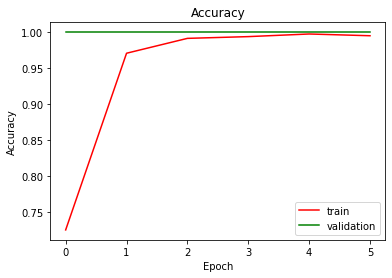

In [ ]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

#### Plotting the loss of model againt the validation scores

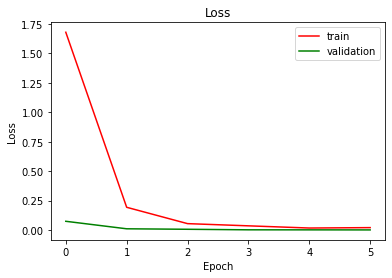

In [ ]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

#### Extracting Final Results for evaluation

In [ ]:
results_Resnet101 = model.evaluate(test_gemerator)


2/2 [==============================] - 4s 2s/step - loss: 0.0504 - accuracy: 0.9667


#### Helper Methods to predict the output

In [26]:
def predict_prob(number):
  return [number[0],1-number[0]]


In [27]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    predict_x=model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    answer = icd[classes_x[0]]
    
    prob = np.array(list(map(predict_prob, model.predict(img))))
    prob = prob[0].flatten()
    prob = prob[0] * 100
    print (prob, ' % chances are there that the Bird Is',answer)

## Evaluation - Resnet 101

### Using the trained model to predict
We obeserve the accuracy of the model is quite high, resnet has pre trained weights which we use to further trainour model.

1/1 [==============================] - 0s 283ms/step
99.99924898147583  % chances are there that the Bird Is ANNAS HUMMINGBIRD


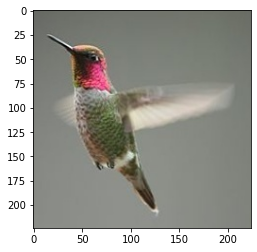

In [28]:
img='../../../../../DataSets/IMG-100/images to test/1.jpg'
pic=load_img('../../../../../DataSets/IMG-100/images to test/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

7.320754775719251e-05  % chances are there that the Bird Is ANTBIRD


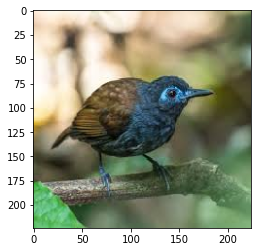

In [16]:
img='../../../../../DataSets/IMG-100/images to test/2.jpg'
pic=load_img('../../../../../DataSets/IMG-100/images to test/2.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

0.017284265777561814  % chances are there that the Bird Is BARN SWALLOW


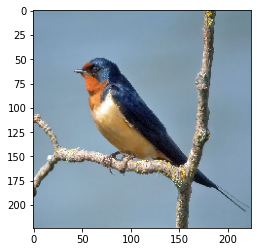

In [17]:
img='../../../../../DataSets/IMG-100/images to test/3.jpg'
pic=load_img('../../../../../DataSets/IMG-100/images to test/3.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

### Undestanding Alexnet

Alexnet was depeleoped by **Alex Krizhevsky** and his team to compete in **Imagenet large-scale visual recognition challenge in 2012**, the model won the competition, it was developed upon **Lenet-5** with added depth, below is the model parametes used in competion.

<img src='https://www.mdpi.com/remotesensing/remotesensing-09-00848/article_deploy/html/images/remotesensing-09-00848-g001.png'>

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-19-16-01-03.png'/>

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-19-16-01-13.png'/>

In Summary
1. It has 8 layers with params
2. RGB Input
3. 5 Cov-Layer wit Max Pooling Layer
4. 3 Fully Connected layers
5. 2 Droput Layers
6. Softmax Activation

## Modelling AlexNet 2012 - Self Created Not Avaialbe in Keras

Alexnet was developed to compete in large scale image computation using GPU's as the medium of computation, tensorflow doesnot have built in Alexnet module so we have built a custom one to perform as per our needs, as it doesnot have any pretained weights we have run it for more epochs than resnet.

In [18]:
category_count = len(np.unique(test_gemerator.classes))
train_groups = test_gemerator.samples
valid_groups = val_generator.samples

In [19]:
backend.clear_session()
model_alexnet = Sequential()

# Layer 1
model_alexnet.add(Conv2D(64, (3, 3), padding='same', input_shape=(224,224,3)))  # 224X224
model_alexnet.add(Activation('relu'))
model_alexnet.add(BatchNormalization())

# Layer 2
model_alexnet.add(Conv2D(64, (3, 3)))  # 222x222
model_alexnet.add(Activation('relu'))
model_alexnet.add(MaxPooling2D(pool_size=(2, 2)))  # 111x111
model_alexnet.add(BatchNormalization())

# Layer 3
model_alexnet.add(Conv2D(64, (3, 3), padding='same'))
model_alexnet.add(Activation('relu'))
model_alexnet.add(BatchNormalization())


# Layer 4
model_alexnet.add(Conv2D(64, (3, 3)))  # 109x109
model_alexnet.add(Activation('relu'))
model_alexnet.add(MaxPooling2D(pool_size=(2, 2)))  # 54x54
model_alexnet.add(BatchNormalization())
model_alexnet.add(Dropout(0.35))  # 64 --> 42

# Layer 5
model_alexnet.add(Conv2D(64, (3, 3), padding='same'))  # 54x54
model_alexnet.add(Activation('relu'))
model_alexnet.add(BatchNormalization())

# Layer 6
model_alexnet.add(Conv2D(64, (3, 3), padding='same'))  # 54x54
model_alexnet.add(Activation('relu'))
model_alexnet.add(MaxPooling2D(pool_size=(2, 2)))  # 27x27
model_alexnet.add(BatchNormalization())

# Layer 7
model_alexnet.add(Flatten())
model_alexnet.add(Dropout(0.5))
model_alexnet.add(Dense(225))
model_alexnet.add(Activation('relu'))
model_alexnet.add(BatchNormalization())
model_alexnet.add(Dense(1))  # Updated for number of classes
model_alexnet.add(Activation('softmax'))

model_alexnet.summary()

#Compile
model_alexnet.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                      

c:\ProgramData\Miniconda3\envs\dbsenvalt\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#### Training the Alexnet for 15 epochs

In [20]:
#fit model
history_alexnet = model_alexnet.fit_generator(
    train_generator,
    steps_per_epoch=train_groups,
    epochs=15,
    validation_data=val_generator,
    validation_steps=valid_groups,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                 patience=2, verbose=1)])


C:\Users\sunil\AppData\Local\Temp\ipykernel_9300\1151162246.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_alexnet = model_alexnet.fit_generator(


Epoch 1/15
30/30 [==============================] - 114s 4s/step - loss: 0.0000e+00 - accuracy: 0.1830 - val_loss: 0.0000e+00 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 2/15
30/30 [==============================] - 114s 4s/step - loss: 0.0000e+00 - accuracy: 0.1854 - lr: 0.0010
Epoch 3/15
30/30 [==============================] - 112s 4s/step - loss: 0.0000e+00 - accuracy: 0.1894 - lr: 0.0010
Epoch 4/15
30/30 [==============================] - 116s 4s/step - loss: 0.0000e+00 - accuracy: 0.1979 - lr: 0.0010
Epoch 5/15
30/30 [==============================] - 113s 4s/step - loss: 0.0000e+00 - accuracy: 0.1723 - lr: 0.0010
Epoch 6/15
30/30 [==============================] - 113s 4s/step - loss: 0.0000e+00 - accuracy: 0.1809 - lr: 0.0010
Epoch 7/15
30/30 [==============================] - 114s 4s/step - loss: 0.0000e+00 - accuracy: 0.1813 - lr: 0.0010
Epoch 8/15
30/30 [==============================] - 116s 4s/step - loss: 0.0000e+00 - accuracy: 0.1979 - lr: 0.0010
Epoch 9/15
30/30 [========

## Evaluating Alexnet

### Plotting the model accuracy without validation accuracy

As we have reduced our model on val_loss tensor flow doesnot provide us with the value to plot against validation, but we can provide the modal **accuracy**, and modal **loss**.

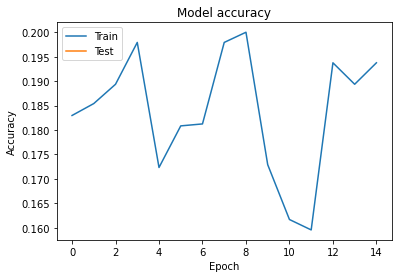

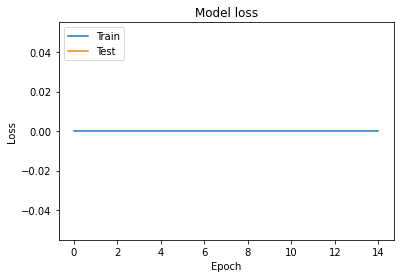

2/2 [==============================] - 2s 828ms/step - loss: 0.0000e+00 - accuracy: 0.1667
Test loss: 0.0
Test accuracy: 0.1666666716337204


In [21]:
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores_alexnet = model_alexnet.evaluate(test_gemerator, verbose=1)
print('Test loss:', scores_alexnet[0])
print('Test accuracy:', scores_alexnet[1])


In [22]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    # answer=model.predict_classes(img)
    predict_x = model_alexnet.predict(img)
    classes_x=np.argmax(predict_x,axis=1)
    answer = icd[classes_x[0]]
    
    prob = np.array(list(map(predict_prob, model_alexnet.predict(img))))
    prob = prob[0].flatten()
    prob = prob[0] * 100
    print (prob, ' % chances are there that the Bird Is',answer)

In [23]:
results_alexnet = model_alexnet.evaluate(test_gemerator)

2/2 [==============================] - 2s 821ms/step - loss: 0.0000e+00 - accuracy: 0.1667


100.0  % chances are there that the Bird Is ANNAS HUMMINGBIRD


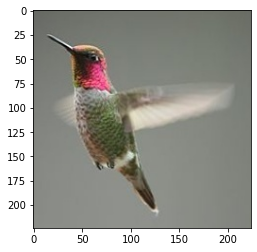

In [24]:
img = '../../../../../DataSets/IMG-100/images to test/1.jpg'
pic = load_img('../../../../../DataSets/IMG-100/images to test/1.jpg',
               target_size=(224, 224, 3))
plt.imshow(pic)
output(img)


### Undestanding VGG's
VGG stands for Visual Geometry Group, it is a standard CNN Designed to compute large scale image classification, depending on layers its called **VGG-16** or VGG-19, we have used VGG-16.

####  Architecture Overview

<img src='https://viso.ai/wp-content/uploads/2021/10/VGG-16-architecture-of-the-model.jpg'>

#### Operation Overview

<img src='https://viso.ai/wp-content/uploads/2021/10/how-vgg-works-convolutional-neural-network.jpg'/>

### VGG Summary
1. Used for Large Scale Image classification
2. Proven to be useful upto 1000 catagories with 97% accuracy
3. Image input size is 244X244
4. **Vanising Gradients** due to which Resnet's were preffered

## Modeling VGG16 - 2014

Like alexnet VGG 16 is also used to compute large collection of images, its developed and provided by tensorflow, so we can use it directly.

In [25]:
backend.clear_session()

base_vgg16 = VGG16(weights='imagenet', include_top=False,
                   input_shape=(224, 224, 3))
# Freeze weights.
base_vgg16.trainable = False  

model_vgg16 = Sequential()
model_vgg16.add(base_vgg16)

model_vgg16.add(Flatten())
model_vgg16.add(Activation('relu'))
model_vgg16.add(Dense(1))
model_vgg16.add(Activation('softmax'))

model_vgg16.summary()

#Compile
model_vgg16.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 activation (Activation)     (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


### Train VGG-16 for 5 epochs

In [26]:
history_vgg16 = model_vgg16.fit_generator(
    train_generator,
    steps_per_epoch=train_groups,
    epochs=5,
    validation_data=val_generator,
    validation_steps=valid_groups,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True), ReduceLROnPlateau(monitor='val_loss', factor=0.7,  # 0.2 to 0.5 dropped to fast 0.7
                                                                                                               patience=2, verbose=1)])


Epoch 1/5


C:\Users\sunil\AppData\Local\Temp\ipykernel_9300\2346692469.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg16 = model_vgg16.fit_generator(


30/30 [==============================] - 119s 4s/step - loss: 0.0000e+00 - accuracy: 0.1766 - val_loss: 0.0000e+00 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 2/5
30/30 [==============================] - 115s 4s/step - loss: 0.0000e+00 - accuracy: 0.1813 - lr: 0.0010
Epoch 3/5
30/30 [==============================] - 116s 4s/step - loss: 0.0000e+00 - accuracy: 0.1745 - lr: 0.0010
Epoch 4/5
30/30 [==============================] - 115s 4s/step - loss: 0.0000e+00 - accuracy: 0.2043 - lr: 0.0010
Epoch 5/5
30/30 [==============================] - 120s 4s/step - loss: 0.0000e+00 - accuracy: 0.1638 - lr: 0.0010


## Evaluating VGG16

### Plotting the model accuracy without validation accuracy

As we have reduced our model on val_loss tensor flow doesnot provide us with the value to plot against validation, but we can provide the modal **accuracy**, and modal **loss**.

- We can observe the model accuracy falling after sometime

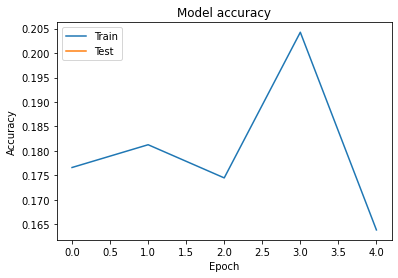

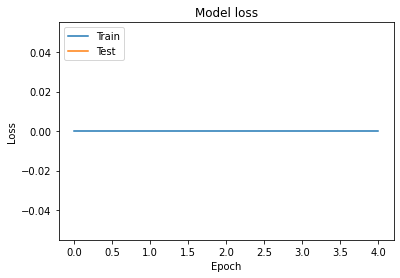

2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.1667
Test loss: 0.0
Test accuracy: 0.1666666716337204


In [27]:
#plot accuracy vs epoch
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores_vgg16 = model_vgg16.evaluate(test_gemerator, verbose=1)
print('Test loss:', scores_vgg16[0])
print('Test accuracy:', scores_vgg16[1])


In [28]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    # answer=model.predict_classes(img)
    predict_x = model_vgg16.predict(img)
    classes_x=np.argmax(predict_x,axis=1)
    answer = icd[classes_x[0]]
    
    prob = np.array(list(map(predict_prob, model_vgg16.predict(img))))
    prob = prob[0].flatten()
    prob = prob[0] * 100
    print (prob, ' % chances are there that the Bird Is',answer)

In [29]:
results_vgg16 = model_vgg16.evaluate(test_gemerator)

2/2 [==============================] - 7s 4s/step - loss: 0.0000e+00 - accuracy: 0.1667


100.0  % chances are there that the Bird Is ANNAS HUMMINGBIRD


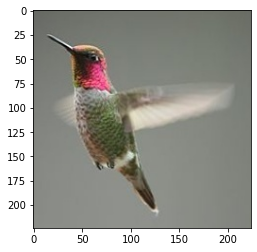

In [30]:
img = '../../../../../DataSets/IMG-100/images to test/1.jpg'
pic = load_img('../../../../../DataSets/IMG-100/images to test/1.jpg',
               target_size=(224, 224, 3))
plt.imshow(pic)
output(img)


## Evaluation Conclusion

Plotting accuracy of each model against each other we can observe the **RESNET-101** is more accuate, so for the final model we will use **RESNET-101**

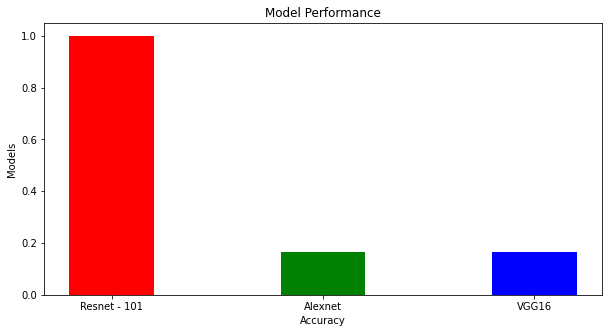

In [39]:
fig = plt.figure(figsize=(10, 5))
models = ['Resnet - 101', 'Alexnet', 'VGG16']
acc = [results_Resnet101[1], results_alexnet[1], results_vgg16[1]]
plt.bar(models, acc, color=['r', 'g', 'b'],
        width = 0.4)
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Model Performance")
plt.show()


## Deployment
Options
- Model is locally deployed
- for deployment we have minimum options as the ***varaible*** folder of the deployment consumes more than 1.4GB of space and no free tier web hosting facilates hosting of that capacity.
- web application is developed and the model deployment folder is provided seperatly, the ***model folder*** when pasted into root directory, i.e where ***app.py*** is located, will provide predictions when run locally

In [48]:
final_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
final_directory = '../../../../../DataSets/IMG-100/final_set'

In [50]:
final_generator = final_datagen.flow_from_directory(final_directory, target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=3)

Found 847 images belonging to 6 classes.


### Training the best model with all the data

In [51]:
backend.clear_session()
model.fit(final_generator, epochs=6)

Epoch 1/6
283/283 [==============================] - 636s 2s/step - loss: 0.2959 - accuracy: 0.9067
Epoch 2/6
283/283 [==============================] - 663s 2s/step - loss: 0.2867 - accuracy: 0.9126
Epoch 3/6
283/283 [==============================] - 641s 2s/step - loss: 0.2502 - accuracy: 0.9292
Epoch 4/6
283/283 [==============================] - 645s 2s/step - loss: 0.3288 - accuracy: 0.9032
Epoch 5/6
283/283 [==============================] - 628s 2s/step - loss: 0.1715 - accuracy: 0.9410
Epoch 6/6
283/283 [==============================] - 595s 2s/step - loss: 0.2139 - accuracy: 0.9268


### Creating Deployment Directory

In [52]:
dir = "saved_models"
subdir = "1"
if os.path.isdir(dir):
    print("Path Exists")
else :
    os.mkdir(dir)
    if os.path.isdir(subdir):
        print("sub dir exists")
    else:
        os.mkdir(dir + "/" + subdir)

        

Path Exists


### Saving to Deployment Directory

In [59]:
model.save(dir + "/" + subdir)


INFO:tensorflow:Assets written to: saved_models/1\assets


INFO:tensorflow:Assets written to: saved_models/1\assets


## Saving the Catagory Ref Dictonary as pikle

In [ ]:
with open(dir + "/" + subdir +'/assets/cls_dict.pkl', 'wb') as f:
    pickle.dump(icd, f)

## Summary of the Model

In [55]:
new_model = tf.keras.models.load_model(dir + "/" + subdir)

# Check its architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout_9 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_9 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 2048)              205522944 
                                                                 
 batch_normalization_10 (Bat  (None, 2048)             8192      
 chNormalization)                                     

## Refrences

- TensorFlow. (n.d.). Module: tf.keras.applications.vgg16 | TensorFlow Core v2.9.1. [online] Available at: https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16 [Accessed 26 Jul. 2022].
- TensorFlow. (n.d.). tf.keras.applications.resnet_v2.ResNet101V2 | TensorFlow Core v2.9.1. [online] Available at: https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2/ResNet101V2 [Accessed 26 Jul. 2022].
- Alake, R. (2020). Implementing AlexNet CNN Architecture Using TensorFlow 2.0+ and Keras. [online] Medium. Available at: https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98.
‌